In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabet_data.csv', header = 0)

In [3]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
X = df.loc[:,df.columns!="class"]
type(X)

pandas.core.frame.DataFrame

In [6]:
X.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
X.shape

(768, 8)

In [8]:
y = df["class"]
type(y)

pandas.core.series.Series

In [9]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler().fit(X_train)

In [14]:
X_train_std = sc.transform(X_train)

In [15]:
X_test_std = sc.transform(X_test)

In [16]:
X_test_std

array([[-0.8354355 ,  2.45735903,  0.34674316, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.66399321,  0.85864578, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.15403331,  0.24436264, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.43719633,  0.14198211, ..., -0.17788417,
         1.06487079, -0.79911377]])

In [17]:
from sklearn import svm

In [18]:
clf_svm_1 = svm.SVC(kernel='linear', C=0.01)
t0 = time.time()
clf_svm_1.fit(X_train_std, y_train)
svm_time = time.time() - t0
print("SVM model fitted in %.3f s" % svm_time)

SVM model fitted in 0.012 s


In [19]:
y_test_pred = clf_svm_1.predict(X_test_std)
y_train_pred = clf_svm_1.predict(X_train_std)

In [20]:
y_test_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [23]:
confusion_matrix(y_test, y_test_pred)

array([[99,  8],
       [19, 28]], dtype=int64)

In [24]:
accuracy_score(y_test, y_test_pred)

0.8246753246753247

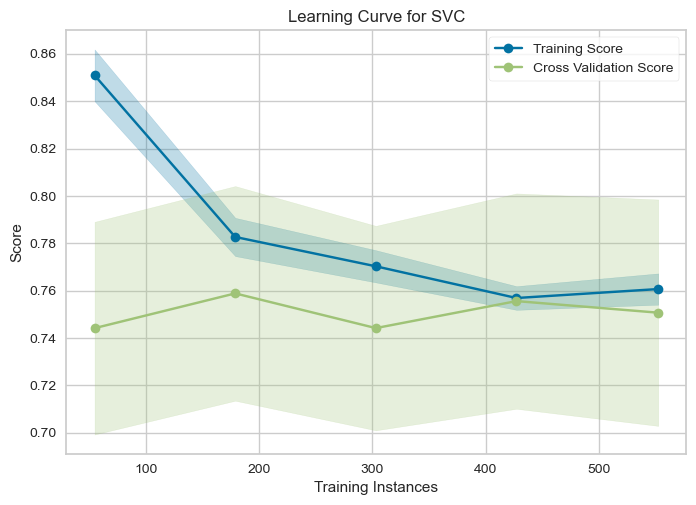

<Axes: title={'center': 'Learning Curve for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [25]:
from yellowbrick.model_selection import ValidationCurve, LearningCurve
learning_curve = LearningCurve(clf_svm_1, cv=10)


# Fit the model on the training data
learning_curve.fit(X_train, y_train)

# Plot the learning curve
learning_curve.show()

In [26]:
clf_svm_1.n_support_

array([201, 200])

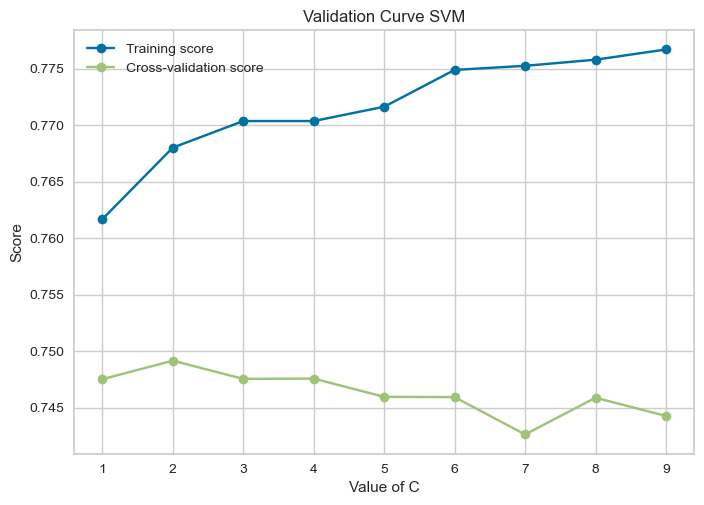

In [27]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score,validation_curve, GridSearchCV

param_range = np.arange(1, 10, 1)
#print(param_range)
train_scores, test_scores = validation_curve(svm.SVC(random_state=0), X_train, y_train, param_name="C", param_range=param_range, cv=10)
plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Validation Curve SVM')
plt.xlabel('Value of C')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()



In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
params = {'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 500, 1000)}

In [30]:
clf_svm_1 = svm.SVC(kernel = 'linear')

In [31]:
svm_grid_lin = GridSearchCV(clf_svm_1, params, n_jobs=-1,
                           cv=10, verbose=1, scoring='accuracy')

In [32]:
svm_grid_lin.fit(X_train_std, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [33]:
svm_grid_lin.best_params_

{'C': 0.01}

In [34]:
linsvm_clf = svm_grid_lin.best_estimator_

In [35]:
accuracy_score(y_test, linsvm_clf.predict(X_test_std))

0.8246753246753247

# Polynomial Kernel With Hyperparameter Tuning

In [36]:
clf_svm_p3 = svm.SVC(kernel ='poly',degree=2, C=0.01)
clf_svm_p3.fit(X_train_std, y_train)

SVC(C=0.01, degree=2, kernel='poly')

In [37]:
y_train_pred = clf_svm_p3.predict(X_train_std)
y_test_pred = clf_svm_p3.predict(X_test_std)

In [38]:
accuracy_score(y_test, y_test_pred)

0.6948051948051948

In [39]:
clf_svm_p3.n_support_

array([229, 221])

# SVM With Radial Kernel

In [40]:
clf_svm_r = svm.SVC(kernel ='rbf',gamma=0.5, C=1)
clf_svm_r.fit(X_train_std, y_train)

SVC(C=1, gamma=0.5)

In [41]:
y_train_pred = clf_svm_r.predict(X_train_std)
y_test_pred = clf_svm_r.predict(X_test_std)

In [42]:
accuracy_score(y_test, y_test_pred)

0.8051948051948052

In [43]:
clf_svm_p3.n_support_

array([229, 221])

# Radial Grid

In [44]:
params = {'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50), 
               'gamma':(0.001, 0.01, 0.1, 0.5, 1)}

In [45]:
clf_svm_r = svm.SVC(kernel = 'rbf')

In [46]:
svm_grid_rad = GridSearchCV(clf_svm_r, params, n_jobs=-1,
                           cv=3, verbose=1, scoring='accuracy')

In [47]:
svm_grid_rad.fit(X_train_std, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             scoring='accuracy', verbose=1)

In [48]:
svm_grid_rad.best_params_

{'C': 5, 'gamma': 0.001}

In [49]:
radsvm_clf = svm_grid_rad.best_estimator_

In [50]:
accuracy_score(y_test, radsvm_clf.predict(X_test_std))

0.8181818181818182

In [52]:
clf_svm_1 = svm.SVC(kernel='rbf', C=5)
t0 = time.time()
clf_svm_1.fit(X_train_std, y_train)
svm_time = time.time() - t0
print("SVM model fitted in %.3f s" % svm_time)

SVM model fitted in 0.021 s
